In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('../data/Spotify_data.xlsx')

In [3]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

- ordinal: Age, spotify_usage_period, music_recc_rating
- regular nominal: gender, spotify_subscription_plan, premium_sub_willingness, preffered_premium_plan, preferred_listening_content, fav_music_genre, music_time_slot, 
- multiple-choice nominal: spotify_listening_device, music_Influencial_mood, music_lis_frequency, music_expl_method

In [5]:
ordinal = ['Age', 'spotify_usage_period', 'music_recc_rating']

regular_nominal = [
    'Gender', 
    'spotify_subscription_plan', 
    'premium_sub_willingness', 
    'preffered_premium_plan', 
    'preferred_listening_content', 
    'fav_music_genre', 
    'music_time_slot'
]

multiple_choice_nominal = [
    'spotify_listening_device', 
    'music_Influencial_mood', 
    'music_lis_frequency', 
    'music_expl_method'
]

ordinal = ['Age', 'spotify_usage_period', 'music_recc_rating']

In [6]:
def multiple_choice_one_hot(df, column):
    """
    Given a dataframe and a column that contains multiple choice answers,
    create a new column for each choice.
    """
    # Get all possible choices
    choices = set()
    for choice in df[column]:
        choices.update([c for c in choice.split(', ') if ',' not in c])

    # Create a new column for each choice
    for choice in choices:
        new_column = choice.replace(' ', '_').lower()
        df[new_column] = df[column].apply(lambda x: choice in x)

    return df

In [7]:
df_music = df.copy().loc[:, :'music_recc_rating']

categoricals = dict()
reassign = dict()
for col in ordinal:
    categoricals[col] = pd.Categorical(df_music[col], ordered=True)
    reassign[col] = categoricals[col].codes

df_encoded = df_music.assign(**reassign)
df_encoded = pd.get_dummies(df_encoded, columns=regular_nominal)

for col in multiple_choice_nominal:
    df_encoded = multiple_choice_one_hot(df_encoded, col)
    df_encoded.drop(col, axis=1, inplace=True)

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

df_normalized.head()

,Age,spotify_usage_period,music_recc_rating,Gender_Female,Gender_Male,Gender_Others,spotify_subscription_plan_Free (ad-supported),spotify_subscription_plan_Premium (paid subscription),premium_sub_willingness_No,premium_sub_willingness_Yes,...,while_traveling,when_cooking,night_time,others,social_media,friends,playlists,recommendations,search,radio
0,0.25,1.000000,0.50,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.00,1.000000,0.25,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.50,0.333333,0.75,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.25,0.000000,0.75,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.25,0.000000,0.75,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [8]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_normalized)

df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

df_tsne.head()

,TSNE1,TSNE2
0,-22.706465,-8.832182
1,-29.244001,-1.437668
2,-3.000591,-5.654607
3,9.081364,-6.774869
4,7.646206,-6.345119


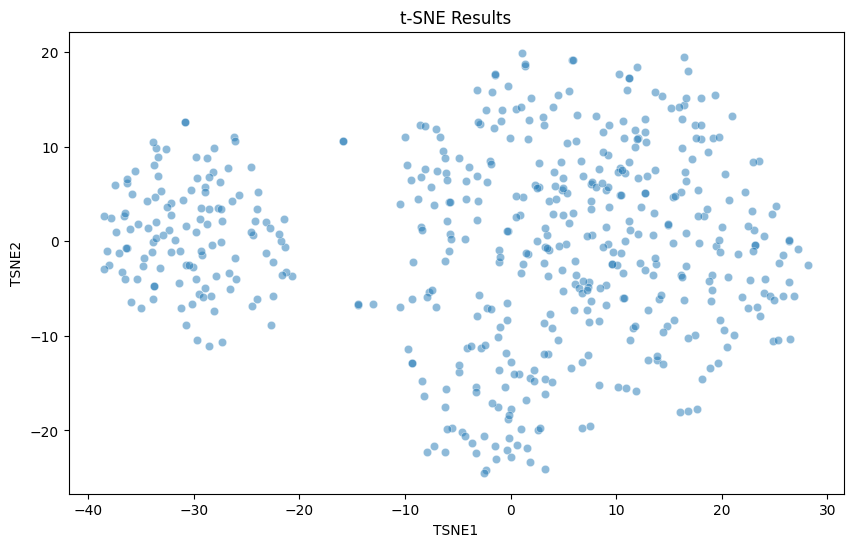

In [9]:
# Plot the t-SNE results using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=df_tsne, alpha=0.5)
plt.title('t-SNE Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [15]:
c1_df = df_tsne[(df_tsne['TSNE2'] > -12) & (df_tsne['TSNE1'] < 10) & (df_tsne['TSNE1'] > -40) & (df_tsne['TSNE1'] < -20)]
c2_df = df_tsne[(df_tsne['TSNE2'] > -40) & (df_tsne['TSNE2'] < -12) & (df_tsne['TSNE1'] > -10) & (df_tsne['TSNE1'] < 20)]
c3_df = df_tsne[(df_tsne['TSNE1'] > -10) & (df_tsne['TSNE1'] < 40) & (df_tsne['TSNE2'] > 0) & (df_tsne['TSNE2'] < 30)]

In [17]:
import numpy as np

df_tsne['cluster'] = np.nan
df_tsne.iloc[c1_df.index, 2] = 1
df_tsne.iloc[c2_df.index, 2] = 2
df_tsne.iloc[c3_df.index, 2] = 3

In [18]:
df_tsne.cluster.value_counts(dropna=False)

cluster
3.0    190
NaN    136
1.0    124
2.0     70
Name: count, dtype: int64

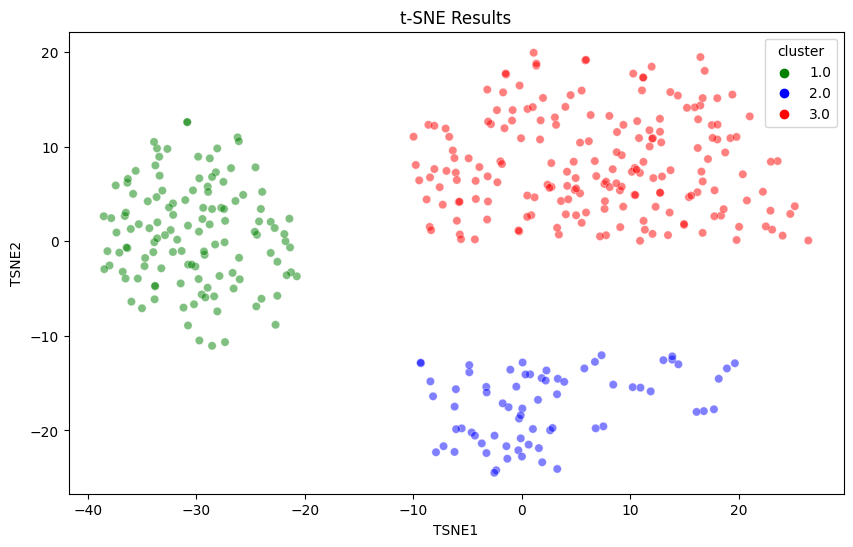

In [22]:
# Plot the t-SNE results using Seaborn
color_dict = {1: 'green', 2: 'blue', 3: 'red'}
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', palette=color_dict, data=df_tsne, alpha=0.5)
plt.title('t-SNE Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

**Cluster 1**
- most are 20-35 but plenty 12-20
- most accs are between 6 mths and 2 yrs (newer)
- mostly female
- evenly distributed between free and paid
- most prefer podcast but plenty music
- most like classical and rap, but plenty pop
- most are afternoon but plenty morning
- most listen for uplifing and sadness 
- most listen when traveling, workout, study
- most use radio but plenty playlists
- most DO NOT rate spotify recommendation highly

**Cluster 2**
- most 20-35
- most accs are more than 2 yrs but plenty 1yr or 6 mths
- mostly female but close
- evenly distributed between free and paid
- all but 3 prefer music
- most like melody and pop
- most are night
- most listen for relaxation, uplifing and sadness, but plenty social
- most listen when workout, lesiure, traveling
- most use recommendations and playlist
- most rate spotify recommendation highly

**Cluster 3**
- most 20-35 
- well distributed between old and new accs
- most are female
- **all but 2 are free**
- most prefer music
- most like melody as favorite, but plenty pop
- most are night, but plenty others
- most listen for relaxation and uplifing
- most listen when traveling, leisure, some office
- most use recommendations and playlists for exploration
- most rate spotify recommendation highly

In [58]:
lis_freqs = set()
for freq in df.music_expl_method:
    lis_freqs.update(freq.split(', '))
lis_freqs

{'Friends',
 'Others',
 'Playlists',
 'Radio',
 'Search',
 'Social media',
 'recommendations',
 'recommendations,Others'}

In [67]:
c1_vals = df.iloc[c1_df.index]
c2_vals = df.iloc[c2_df.index]
c3_vals = df.iloc[c3_df.index]
c3_vals.columns

Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')

In [80]:
col = 'music_expl_method'
print(c1_vals[f'{col}'].value_counts())
print(c2_vals[f'{col}'].value_counts())
print(c3_vals[f'{col}'].value_counts())

music_expl_method
Radio                                 47
Playlists                             22
Others                                15
Playlists, Radio                       9
recommendations                        6
Playlists, Others                      5
Playlists, Radio, Others               5
Radio, Others                          4
recommendations, Playlists, Radio      4
recommendations, Radio, Others         4
recommendations, Playlists             1
recommendations, Playlists, Others     1
recommendations, Radio                 1
Name: count, dtype: int64
music_expl_method
recommendations, Playlists                   20
recommendations                              11
Others                                        7
recommendations, Playlists, Radio             6
Playlists                                     6
recommendations, Playlists, Others            5
Playlists, Radio                              4
recommendations, Others                       4
recommendations, Radi

In [38]:
def multiple_choice_one_hot(df, column):
    """
    Given a dataframe and a column that contains multiple choice answers,
    create a new column for each choice.
    """
    # Get all possible choices
    choices = set()
    for choice in df[column]:
        choices.update(choice.split(', '))

    # Create a new column for each choice
    for choice in choices:
        new_column = choice.replace(' ', '_').replace(',', '_').lower()
        df[new_column] = df[column].apply(lambda x: choice in x)

    return df

In [9]:
df.music_Influencial_mood.value_counts()

music_Influencial_mood
Relaxation and stress relief                                                                                     195
Uplifting and motivational                                                                                        67
Sadness or melancholy                                                                                             55
Relaxation and stress relief, Uplifting and motivational                                                          44
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties     35
Relaxation and stress relief, Sadness or melancholy                                                               33
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy                                   22
Social gatherings or parties                                                                                      16
Relaxation and stress relief, Uplifting a